# Video Games Sales Analysis And Visualization
##### Hello everyone. I came across this clean dataset 'Video Game Sales' on Kaggle. At first look I thought of skipping and started looking for something else as I was looking to build a predictive model for a dataset. Later I came back here and motivated myself to get into some data analyses. This data seems perfect for that. 


#### The goal of this notebook is to analyse the video game dataset and create some meaningful visualizations. I have tried to use various color patterns provided by seaborn. The dataset seems really good as there are no null values. The feature engineering part was not required atleast for my work.

### Some of the important visualizations in this notebook are:
1. Number of Games made as per Genre type
2. Pie polts to visualize the sales as per regions for the top years.
3. Highest revenue by a single game every year with its pivot table.
4. Sales comparison by Genre in different regions using a heatmap.
5. Sales comparison of different regions based on genre type.
6. Distribution of Total Revenue Per Region by Year in Millions.

### Just know your features before starting to code.
1. Rank - Ranking of overall sales
2. Name - The games name
3. Platform - Platform of the games release (i.e. PC,PS4, etc.)
4. Year - Year of the game's release
5. Genre - Genre of the game
6. Publisher - Publisher of the game
7. NA_Sales - Sales in North America (in millions)
8. EU_Sales - Sales in Europe (in millions)
9. JP_Sales - Sales in Japan (in millions)
10. Other_Sales - Sales in the rest of the world (in millions)
11. Global_Sales - Total worldwide sales.

## Step 1: Importing all the needed libraries and loading our dataset.
##### I am primarily going to us seaborn for my visualizations. It is an amazing open source library for Data analyses. 
read more about seaborn here: https://seaborn.pydata.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
%matplotlib.inline

C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### As we can see below there are no missing values. There are a few which I will just drop as they are not much in numbers.
To check some steps involved in feature engineering kindly visit my this notebook: https://www.kaggle.com/vikasbhadoria/data-cleaning-feature-engineering-predict-profit

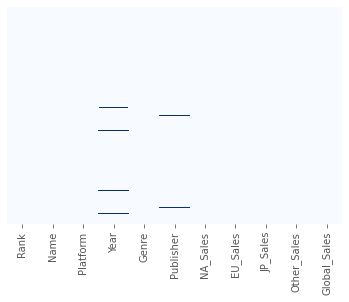

In [6]:
sns.heatmap(df.isnull(),cmap='Blues',cbar=False,yticklabels=False)

In [7]:
df = df.dropna(how='any')

### Looking through some numbers before visualisations to have a clear idea what are we dealing with.

In [8]:
print("Number of games: ", len(df))
print("Number of publishers: ", len(df['Publisher'].unique()))
print("Number of platforms: ", len(df['Platform'].unique()))
print("Number of genres: ", len(df['Genre'].unique()))

Number of games:  16291
Number of publishers:  576
Number of platforms:  31
Number of genres:  12


### I found one meaningful distribution i.e 'sales distribution over years' when I drew a histogram of the whole data. 

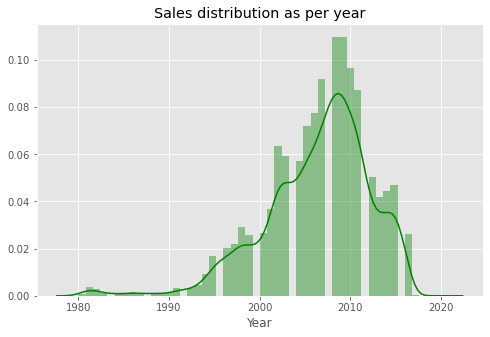

In [9]:
plt.figure(figsize=(8,5))
plt.title('Sales distribution as per year')
ax = sns.distplot(df['Year'], color = 'g')

### So the first important visualization is below which shows the exact number of games as per genre type. Clearly most of the games released in last 20 years are Action games. Strange the racing games are laggin a bit. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

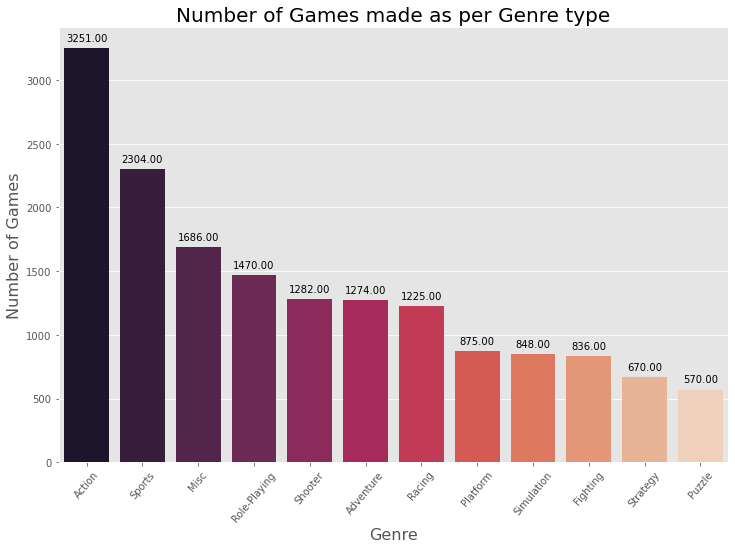

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index, palette="rocket")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext= (0, 10), textcoords = 'offset points')
ax.set_title(label='Number of Games made as per Genre type', fontsize=20)
ax.set_xlabel(xlabel='Genre', fontsize=16)
ax.set_ylabel(ylabel='Number of Games', fontsize=16)
plt.xticks(rotation=50)

### The graph below shows the game sales in millions every year. The period between 2006 to 2011 saw the most revenue for the gaming companies.

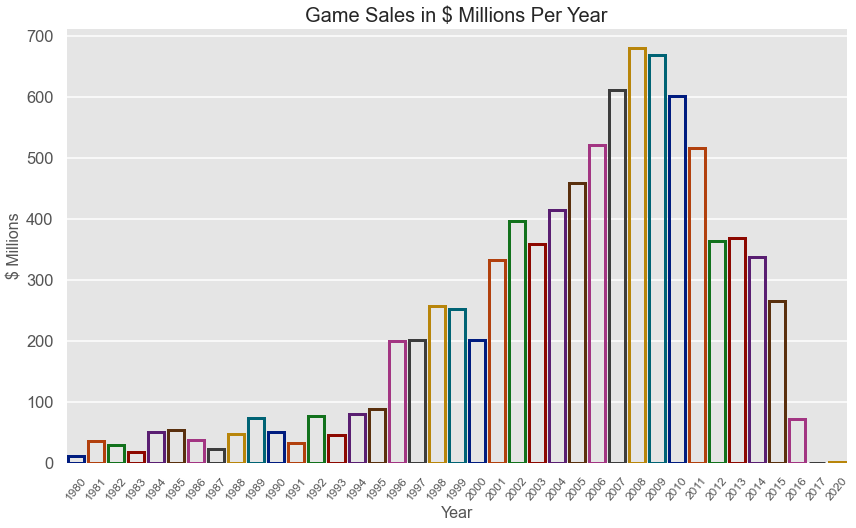

In [58]:
y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(14,8))
ax = sns.barplot(y = y, x = x,facecolor=(0, 0, 0, 0),
                   linewidth=3,
                   edgecolor=sns.color_palette("dark", 10))
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Millions', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

### The graph below shows the number of games relesed every year. So there seems a direct correlation between Revenue & Games released which is obvious. The more games released the higher is the revenue.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

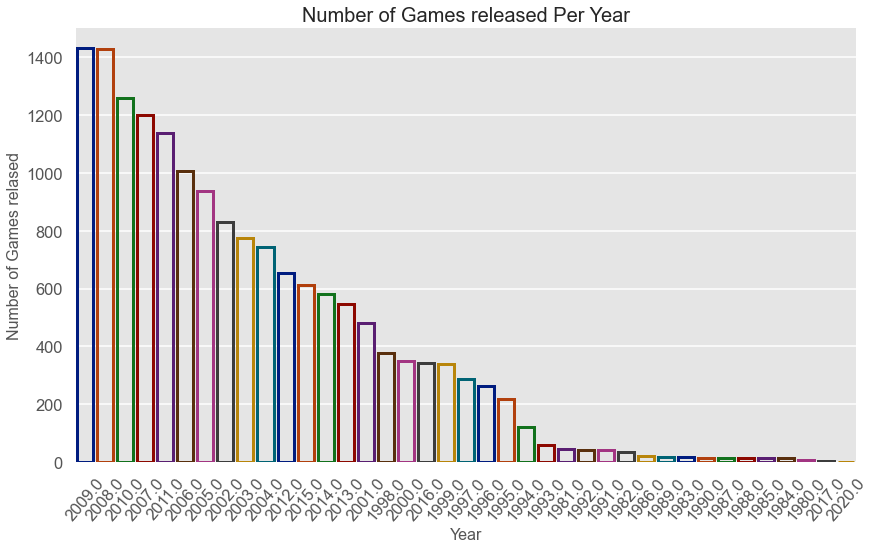

In [54]:
plt.figure(figsize=(14, 8))
plt.style.use('ggplot')
ax = sns.countplot(x="Year", data=df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index,facecolor=(0, 0, 0, 0),
                   linewidth=3,
                   edgecolor=sns.color_palette("dark", 10))
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Number of Games relased', fontsize=16)
ax.set_title(label='Number of Games released Per Year', fontsize=20)
plt.xticks(rotation=50)

### Using pie graphs to visualise the sales of different regions over the top 6 years. I have decided to make this only for the most profitable period of '2006-2011'. Clearly the sales in North America is much higher in all the 6 years. Maybe because of higher population. 

In [46]:
df_to_pie = df.drop(['Name','Platform', 'Genre', 'Publisher','Global_Sales','Rank'], axis = 1).groupby('Year').agg('sum')
df_to_pie.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70


Text(0, 0.5, '')

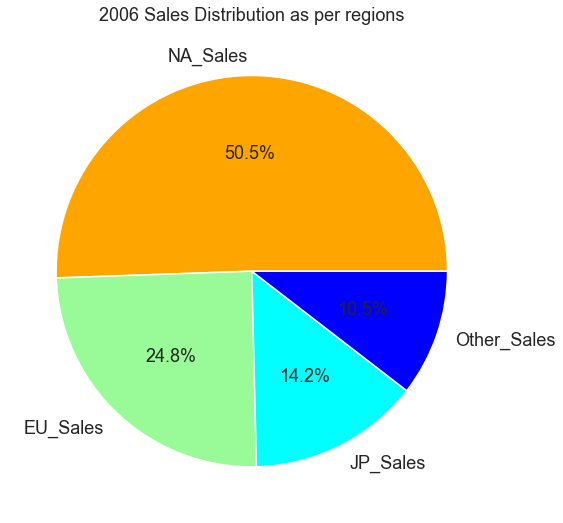

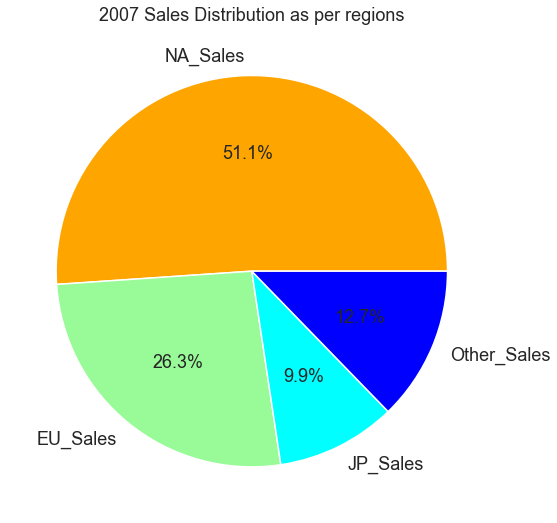

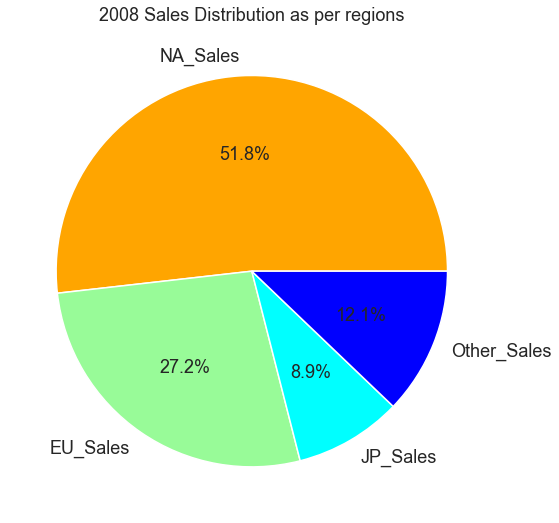

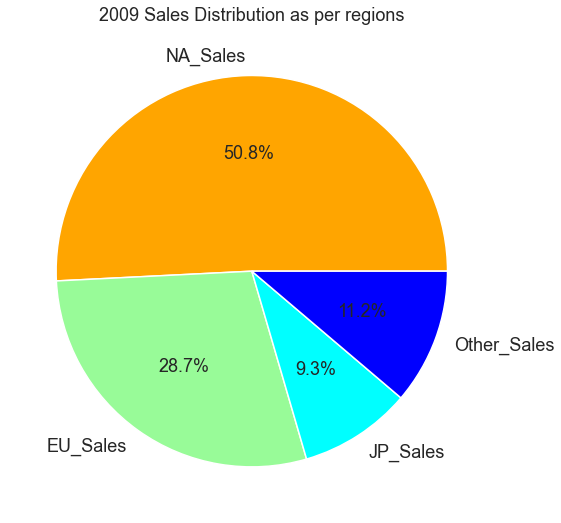

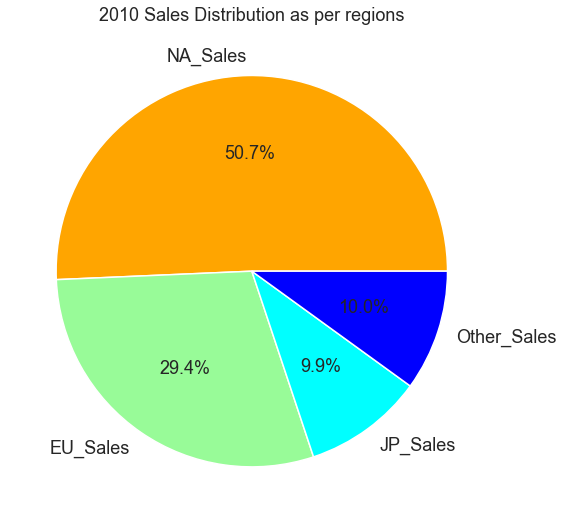

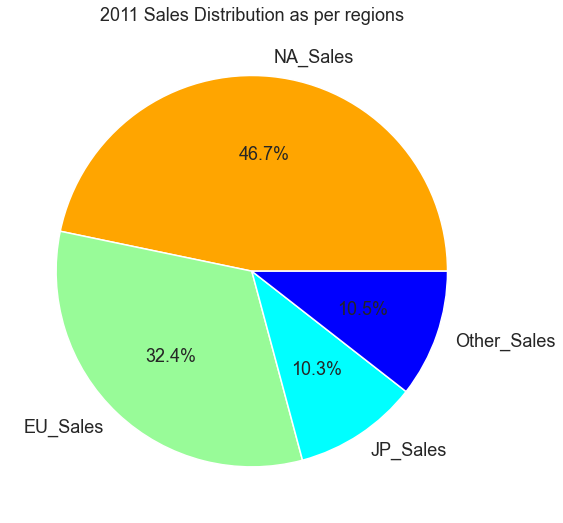

In [49]:
index = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
series = pd.DataFrame({'2006': df_to_pie.loc[[2006],:].values.tolist()[0],
                      '2007': df_to_pie.loc[[2007],:].values.tolist()[0],
                      '2008': df_to_pie.loc[[2008],:].values.tolist()[0],
                      '2009': df_to_pie.loc[[2009],:].values.tolist()[0],
                       '2010': df_to_pie.loc[[2010],:].values.tolist()[0],
                       '2011': df_to_pie.loc[[2011],:].values.tolist()[0]}, index=index)
series.plot.pie(y='2006',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2006 Sales Distribution as per regions').set_ylabel('')
series.plot.pie(y='2007',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2007 Sales Distribution as per regions').set_ylabel('')
series.plot.pie(y='2008',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2008 Sales Distribution as per regions').set_ylabel('')
series.plot.pie(y='2009',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2009 Sales Distribution as per regions').set_ylabel('')
series.plot.pie(y='2010',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2010 Sales Distribution as per regions').set_ylabel('')
series.plot.pie(y='2011',figsize=(9, 9), autopct='%1.1f%%', colors=['orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2011 Sales Distribution as per regions').set_ylabel('')

### Its always a good practice to have some pivot tables. The table below shows the top 10 publishers of the video games. 

In [72]:
top_publishers = pd.pivot_table(df,index='Publisher', values='Global_Sales').sort_values('Global_Sales', ascending = False)
top_10_publishers = top_publishers.head(10)

In [73]:
top_10_publishers

,Global_Sales
Publisher,
Palcom,4.170000
Red Orb,2.620000
Nintendo,2.563836
Arena Entertainment,2.360000
UEP Systems,2.250000
RedOctane,2.170000
Valve,1.740000
Hello Games,1.600000
Sony Computer Entertainment Europe,1.592667


### Just to check which game exactly was the most profitable in last 20 years I have supported my graph with a pivot table below. SO in 2006 Wii sports had the best sucess followed by Super Mario bros in 1985.

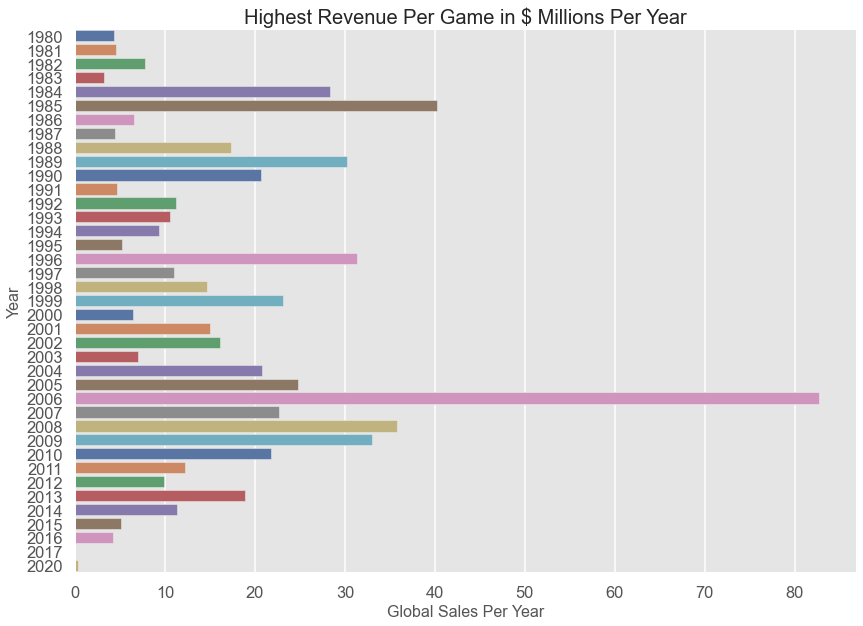

,Game,Global Sales
1980,Asteroids,4.310
1981,Pitfall!,4.500
1982,Pac-Man,7.810
1983,Baseball,3.200
1984,Duck Hunt,28.310
1985,Super Mario Bros.,40.240
1986,The Legend of Zelda,6.510
1987,Zelda II: The Adventure of Link,4.380
1988,Super Mario Bros. 3,17.280
1989,Tetris,30.260


In [78]:
table = df.pivot_table('Global_Sales', index='Name', columns='Year')
table.columns = table.columns.astype(int)
games = table.idxmax()
sales = table.max()
years = table.columns
data = pd.concat([games, sales], axis=1)
data.columns = ['Game', 'Global Sales']


colors = sns.color_palette("deep", len(years))
plt.figure(figsize=(14,10))
ax = sns.barplot(y = years , x = 'Global Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Global Sales Per Year', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Highest Revenue Per Game in $ Millions Per Year', fontsize=20)
plt.show();
data

### I have used this heatmap to see the sales on different regions based on Genre type. 
##### 1. The North American countries prefer Action gaming clearly. 
##### 2. EU countries alse are more inclined towards Action gaming.
##### 3. The japanese rather prefer role-playing games.

In [81]:
genre_comparison = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comparison = genre_comparison.groupby(by=['Genre']).sum()

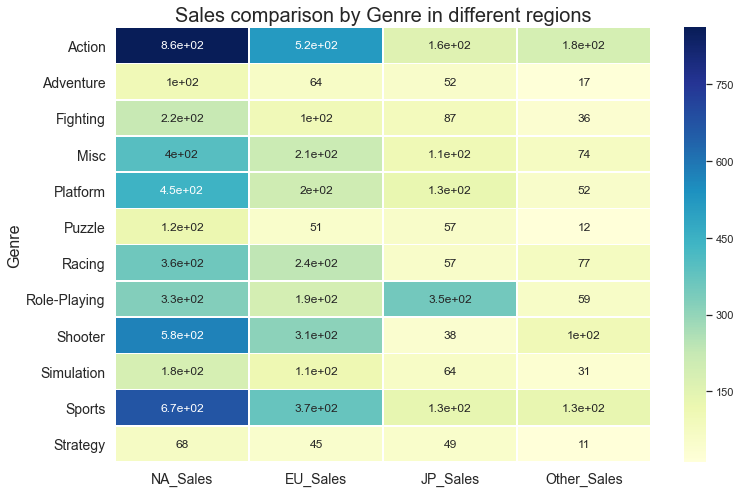

In [85]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(comparison,cmap="YlGnBu",linewidths=.5, annot=True)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel(ylabel='Genre', fontsize=16)
plt.title('Sales comparison by Genre in different regions', fontsize=20)
plt.show()

### The graph below is to support the above heatmap. We can get the same information from this graph. Just the visualization is more clear and readable for a person who do not understand heatmaps.

In [89]:
comparison_table = comparison.reset_index()
comparison_table = pd.melt(comparison_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Region', value_name='Sale_Price')
comparison_table.head()

,Genre,Sale_Region,Sale_Price
0,Action,NA_Sales,861.77
1,Adventure,NA_Sales,101.93
2,Fighting,NA_Sales,220.74
3,Misc,NA_Sales,396.92
4,Platform,NA_Sales,445.99


Text(0.5, 1.0, 'Sales comparison of different regions based on genre type')

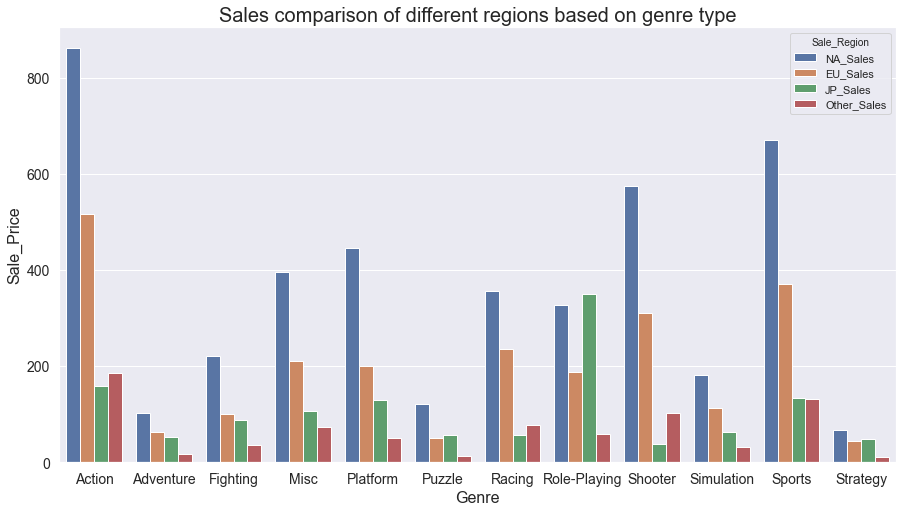

In [97]:
plt.figure(figsize = (15,8))
sns.barplot(x='Genre', y = 'Sale_Price', hue = 'Sale_Region', data = comparison_table, palette='deep')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel='Genre', fontsize=16)
plt.ylabel(ylabel='Sale_Price', fontsize=16)
plt.title('Sales comparison of different regions based on genre type', fontsize=20)

### As seen earlier in pie graphs. The sales in North American countries are much higher. Just used a simple bargraph to visualize it.

In [102]:
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


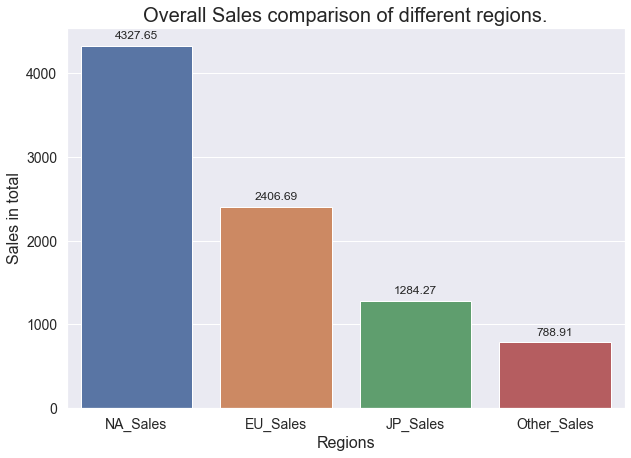

In [108]:
plt.figure(figsize = (10,7))
ax = sns.barplot(x='region',y='sale',data=top_sale_reg)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel='Regions', fontsize=16)
plt.ylabel(ylabel='Sales in total', fontsize=16)
plt.title('Overall Sales comparison of different regions.', fontsize=20)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext= (0, 10), textcoords = 'offset points')

### So these are the most active video game publishers in past 20 years. Releasing the most number of games. 

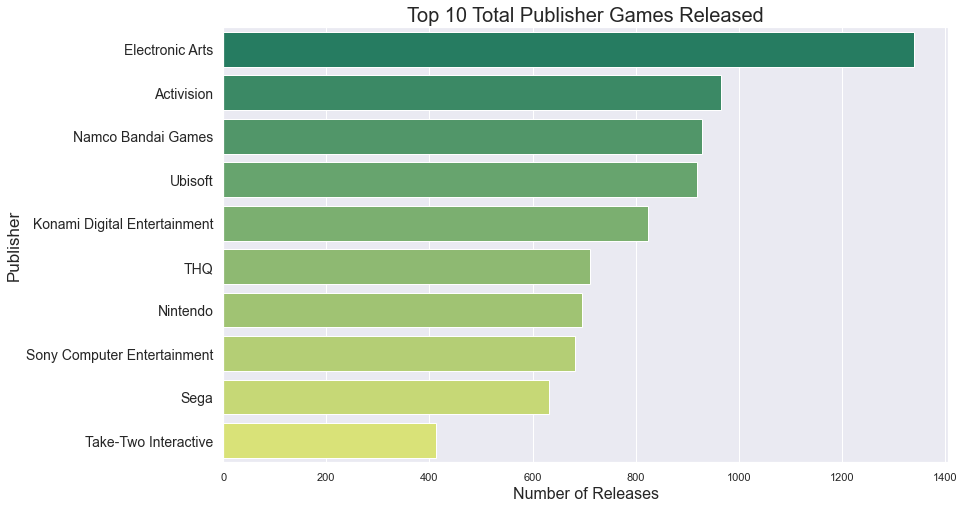

In [122]:
top_publishers = df.groupby(['Publisher']).count().iloc[:,0]
top_publishers = pd.DataFrame(top_publishers.sort_values(ascending=False))[0:10]
publishers = top_publishers.index
top_publishers.columns = ['Releases']

colors = sns.color_palette("summer", len(top_publishers))
plt.figure(figsize=(13,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=top_publishers, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=17)
ax.set_title(label='Top 10 Total Publisher Games Released', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

### But now when we see the most profitable publishers, there are few changes from above graph. Nintendo despite relasing much lesser games has the highest revenue. Surely they would be focusing more on quality rather then quantity.

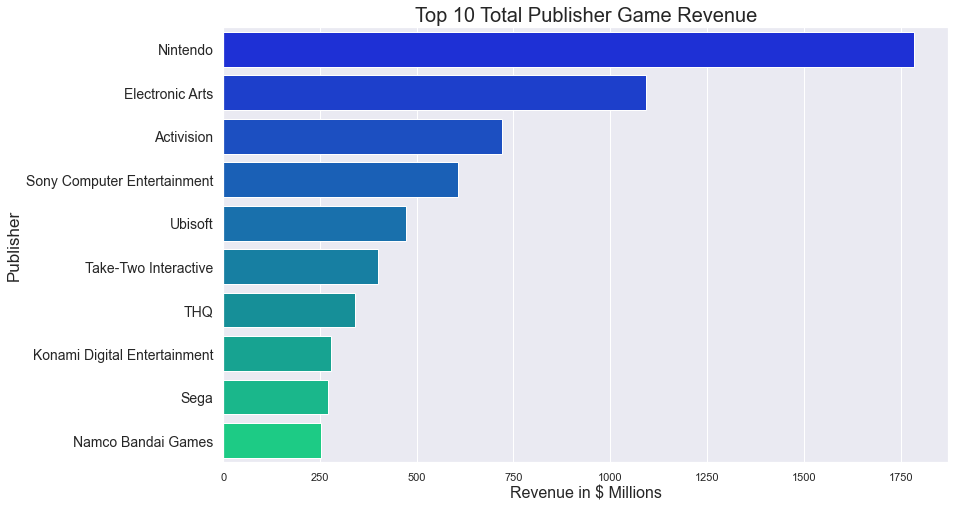

In [119]:
top_publishers_rev = df.groupby(['Publisher']).sum()['Global_Sales']
top_publishers_rev = pd.DataFrame(top_publishers_rev.sort_values(ascending=False))[0:10]
publishers = top_publishers_rev.index
top_publishers_rev.columns = ['Global Sales']

colors = sns.color_palette("winter", len(top_publishers_rev))
plt.figure(figsize=(13,8))
ax = sns.barplot(y = publishers , x = 'Global Sales', data=top_publishers_rev, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=17)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

### So when it comes to genres, Action games has made the most profit. Surely because the have also been the most released games. Maybe Nintendo sells more Action games?? It would be interesting to see that. 

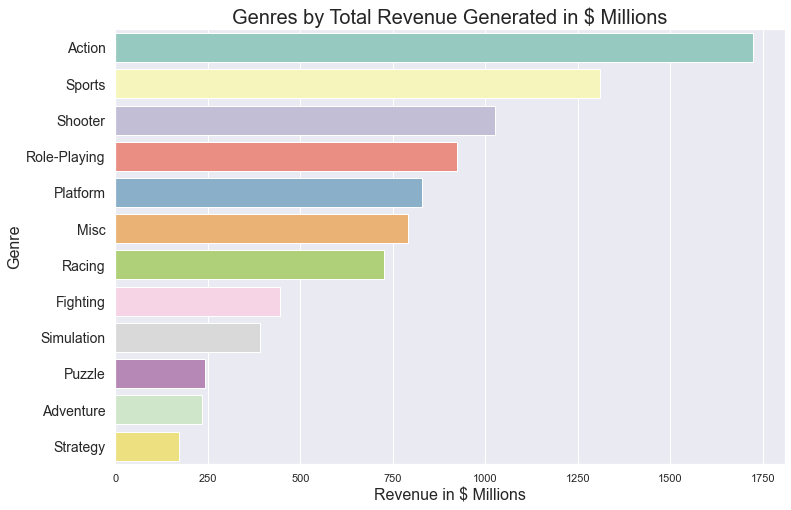

In [126]:
rev = df.groupby(['Genre']).sum()['Global_Sales']
rev = pd.DataFrame(rev.sort_values(ascending=False))
genres = rev.index
rev.columns = ['Revenue']

colors = sns.color_palette('Set3', len(rev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Revenue', data=rev, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();


### Below I have plot the top 10 games by the sales that they have generated since inception.

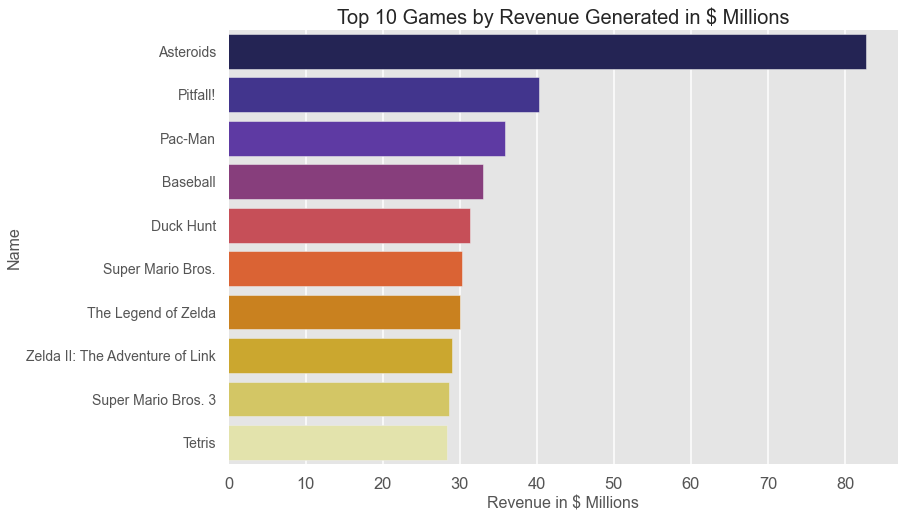

In [142]:
data = pd.concat([df['Name'][0:10], df['Global_Sales'][0:10]], axis=1)

plt.figure(figsize=(12,8))
colors = sns.color_palette("CMRmap", len(data))
ax = sns.barplot(y = 'Name' , x = 'Global_Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Name', fontsize=16)
ax.set_title(label='Top 10 Games by Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = games, fontsize=14)
plt.style.use('ggplot')
plt.show();

### Below I create a pointplot of total sales by region per year. As also seen in above plots. North america is leading in terms of sales all the way. Only in the start of 90's it went below Japan. 

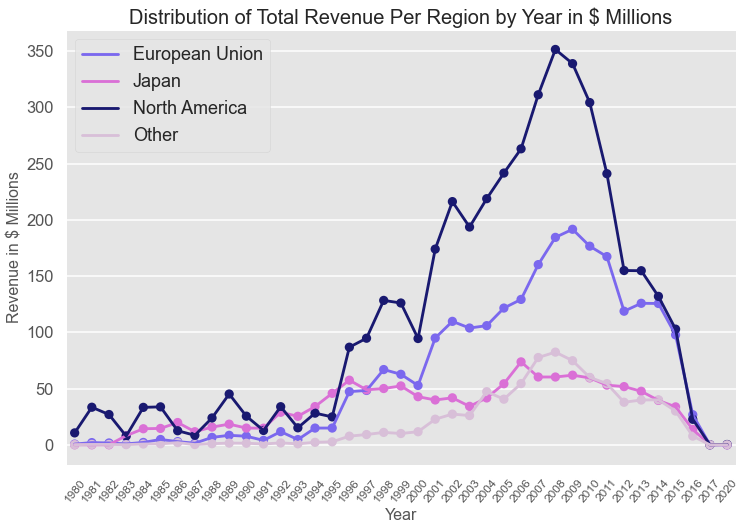

In [149]:
EU = df.pivot_table('EU_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
NA = df.pivot_table('NA_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
JP = df.pivot_table('JP_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
Other = df.pivot_table('Other_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
years = Other.index.astype(int)
regions = ['European Union','Japan','North America','Other']

plt.figure(figsize=(12,8))
ax = sns.pointplot(x=years, y=EU, color='mediumslateblue', scale=0.7)
ax = sns.pointplot(x=years, y=JP, color='orchid', scale=0.7)
ax = sns.pointplot(x=years, y=NA, color='midnightblue', scale=0.7)
ax = sns.pointplot(x=years, y=Other, color='thistle', scale=0.7)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Total Revenue Per Region by Year in $ Millions', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=regions, fontsize=18)
plt.style.use('ggplot')
plt.show();

### Below I plot the distribution of game sales by region.

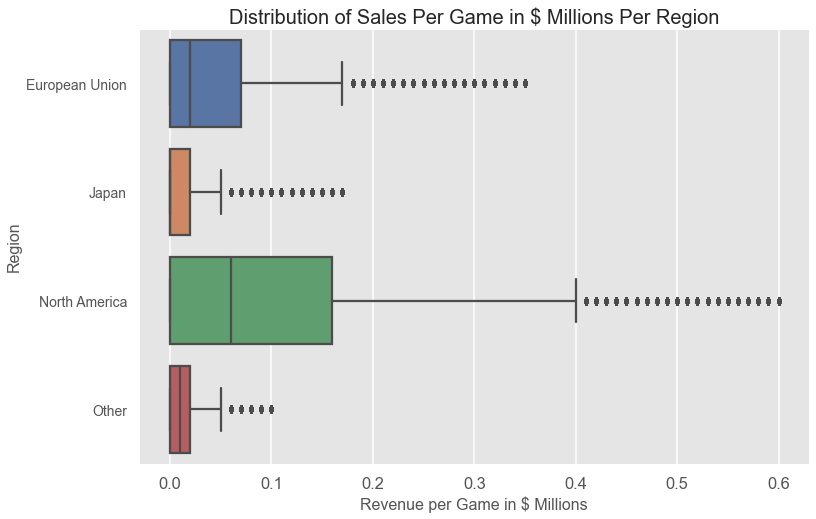

In [140]:
data = df
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['European Union', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data = data[data < q]
plt.figure(figsize=(12,8))

colors = sns.color_palette("deep", len(data))
ax = sns.boxplot(data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Game in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Distribution of Sales Per Game in $ Millions Per Region', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.style.use('ggplot')
plt.show()


### A simple heatmap to look at the correlations between various features.

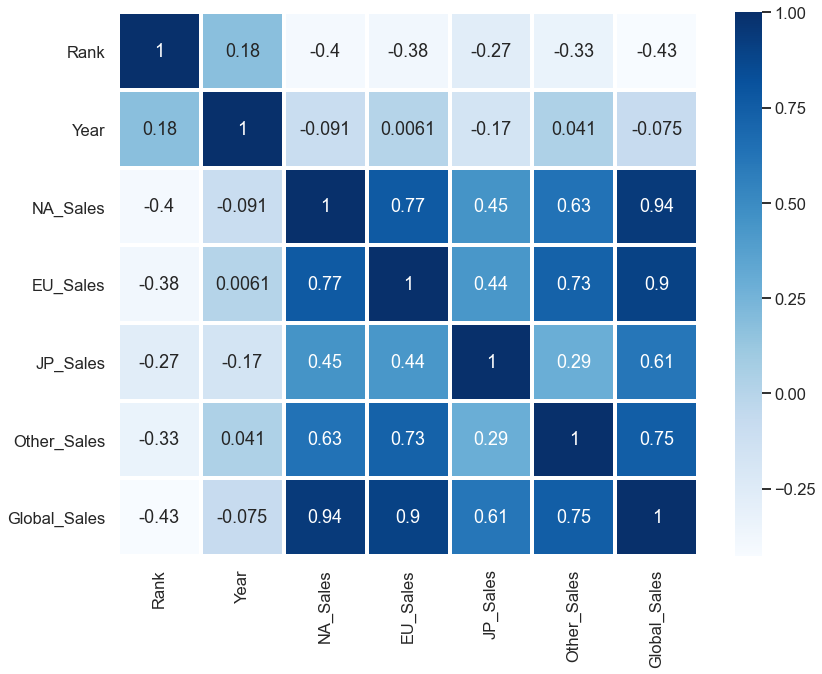

In [135]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap = "Blues", annot=True, linewidth=3)

### I would like to end by visualizing pairplot between various features based on Genres. Normally I use pairplot to understand and finalize which machine larning algorithm should I use. Thats a good practice. But since there is no dependent feature in this dataset which can be predicted I would like to stop after this.

In [137]:
data_pair = df.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair.head(2)

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77


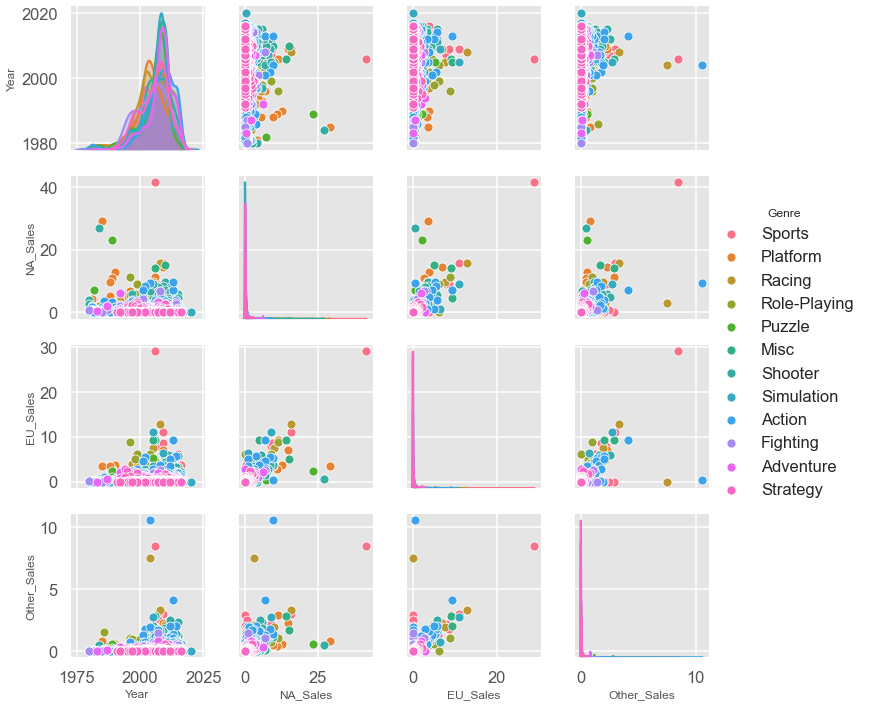

In [139]:
plt.style.use('ggplot')
sns.pairplot(data_pair, hue='Genre')